# Model Training

In [65]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [66]:
df_path = os.path.join('..', 'data', 'raw', 'spam_dataset.csv')
df = None

try:
    df = pd.read_csv(df_path, sep=',')
    print('Dataset has been initialized.')
except Exception as e:
    print(f'Failed to initialize dataset:\n{e}')

Dataset has been initialized.


In [67]:
df.head()

,title,text,date,adress,service,is_spam
0,🔥 Выгода до 90%!,Секретные скидки только для вас! Перейдите по ...,2025-06-18,platon1975@npo.biz,Mail.ru,1
1,🚨 Подозрение на взлом,Мы не можем завершить регистрацию. Подтвердите...,2025-06-10,vseslav2009@kurganmashzavod.edu,Mail.ru,1
2,Вам доступен бонус,Ваш кошелёк выбран для возврата средств от Цен...,2025-05-17,vlas03@zao.info,Gmail,1
3,Вы получили компенсацию!,Получите бонус прямо сейчас! Только сегодня.,2025-06-18,ernst80@zao.com,Outlook,1
4,Ваша карта заблокирована,Секретные скидки только для вас! Перейдите по ...,2025-06-30,novikovsilanti@rao.org,Outlook,1


In [68]:
df['combined'] = df['title'] + ' ' + df['text'] + ' ' + df['service']

In [69]:
X = df['combined']
y = df['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [70]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [71]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [72]:
features = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

top_positive = np.argsort(coefs)[-10:]
top_negative = np.argsort(coefs)[:10]


print("SPAM words:")
for i in reversed(top_positive):
    print(f"{features[i]} ({coefs[i]:.2f})")

print('______')

print("\nRegular words:")
for i in top_negative:
    print(f"{features[i]} ({coefs[i]:.2f})")

SPAM words:
получите (2.95)
сейчас (2.69)
вы (2.21)
подарок (2.05)
для (1.94)
бонус (1.87)
можем (1.87)
не (1.87)
карта (1.82)
ваша (1.82)
______

Regular words:
за (-2.38)
резюме (-1.94)
заказ (-1.92)
проекту (-1.84)
спасибо (-1.83)
вебинаре (-1.76)
почты (-1.71)
адрес (-1.71)
чтобы (-1.71)
пожалуйста (-1.71)


In [73]:
y_pred = model.predict(X_test_vec)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



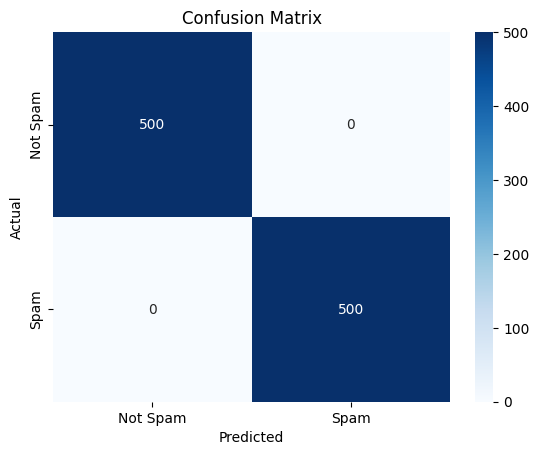

In [75]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [79]:
import joblib

In [82]:
models_path = os.path.join('..', 'src', 'models')

try:
    joblib.dump(model, f'{models_path}/spam_model.pkl')
    joblib.dump(vectorizer, f'{models_path}/vectorizer.pkl')
    print('SPAM MODEL has been successfully saved.')
except Exception as e:
    print(f'Failed to save the model:\n{e}')

SPAM MODEL has been successfully saved.
